In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
tide_df_1 = pd.read_csv("/storage/ngoc54n/FHL_tide_Jul2021-Jul2022.csv")
tide_df_2 = pd.read_csv("/storage/ngoc54n/FHL_tide_Jul2022-June2023.csv")

In [33]:
tide_df = pd.concat([tide_df_1, tide_df_2])

In [34]:
tide_df['datetime'] = tide_df[tide_df.columns[0:2]].apply(lambda x: ' '.join(x), axis=1)
tide_df['datetime'] = pd.to_datetime(tide_df['datetime'])
tide_df['Verified (ft)'].replace('-', np.NaN, inplace=True)
tide_df['Verified (ft)'] = tide_df['Verified (ft)'].astype(float)
tide_df

,Date,Time (GMT),Predicted (ft),Preliminary (ft),Verified (ft),datetime
0,2021/07/15,00:00,1.610,-,1.92,2021-07-15 00:00:00
1,2021/07/15,01:00,3.175,-,3.55,2021-07-15 01:00:00
2,2021/07/15,02:00,4.843,-,5.11,2021-07-15 02:00:00
3,2021/07/15,03:00,6.327,-,6.53,2021-07-15 03:00:00
4,2021/07/15,04:00,7.378,-,7.49,2021-07-15 04:00:00
...,...,...,...,...,...,...
8203,2023/06/22,19:00,0.465,-,NaN,2023-06-22 19:00:00
8204,2023/06/22,20:00,-0.517,-,NaN,2023-06-22 20:00:00
8205,2023/06/22,21:00,-0.914,-,NaN,2023-06-22 21:00:00
8206,2023/06/22,22:00,-0.641,-,NaN,2023-06-22 22:00:00


In [35]:
tide_df = tide_df.set_index('datetime')
tide_df.index = tide_df.index.tz_localize('UTC').tz_convert('US/Pacific')

In [36]:
tide_2022 = tide_df.loc["2022-06-01":"2022-08-31"]

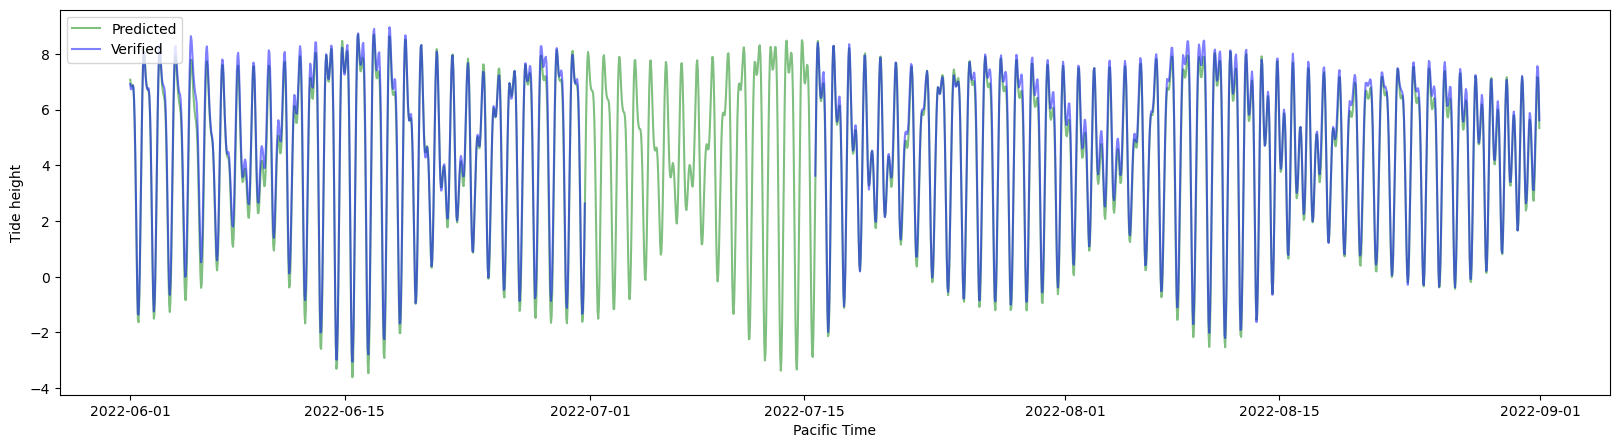

In [38]:
plt.figure(figsize = (20,5))
plt.plot(tide_2022.index, tide_2022["Predicted (ft)"],color = "Green", alpha = 0.5, label = "Predicted")
plt.plot(tide_2022.index, tide_2022["Verified (ft)"], color = "Blue", alpha = 0.5, label = "Verified")
plt.xlabel("Pacific Time")
plt.ylabel("Tide height")
plt.legend(loc="upper left")


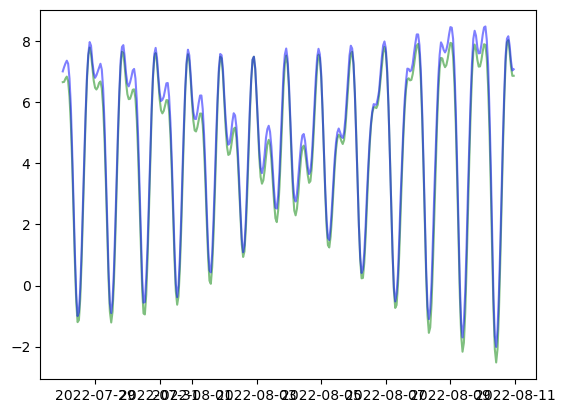

In [39]:
# plt.figure(figsize = (20,10))
plt.plot(tide_2022.loc["2022-07-28":"2022-08-10"].index, tide_2022["Predicted (ft)"].loc["2022-07-28":"2022-08-10"], color = "Green", alpha = 0.5)
plt.plot(tide_2022.loc["2022-07-28":"2022-08-10"].index, tide_2022["Verified (ft)"].loc["2022-07-28":"2022-08-10"], color = "Blue", alpha = 0.5)

<Axes: xlabel='datetime'>

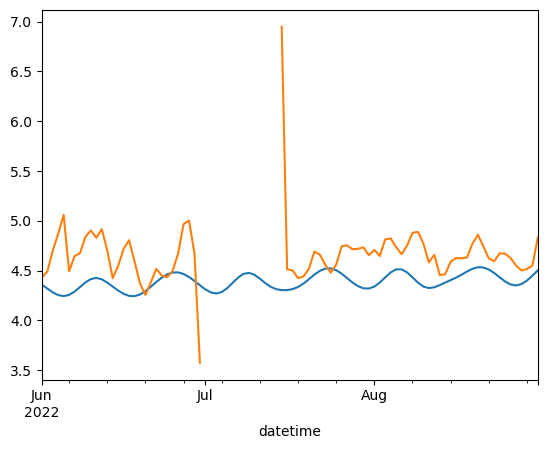

In [41]:
tide_2022['Predicted (ft)'].resample('D').mean().plot()
tide_2022['Verified (ft)'].resample('D').mean().plot()

In [48]:
# Calculate the tidal range over the whole summer of 2022
# ? Is it just the max difference?
# Google: "the observed difference in height between consecutive high and low water observations"
highest_tide_height = max(tide_2022['Predicted (ft)'])
lowest_tide_height = min(tide_2022['Predicted (ft)'])
tidal_range = highest_tide_height - lowest_tide_height
tidal_range

12.304

In [49]:
tide_2022.describe()

,Predicted (ft),Verified (ft),Scaled Predicted
count,2208.000000,1848.000000,2208.000000
mean,4.387800,4.647662,0.356616
std,2.800955,2.695788,0.227646
min,-3.608000,-3.050000,-0.293238
25%,2.454500,2.777500,0.199488
50%,4.995000,5.210000,0.405966
75%,6.755500,6.920000,0.549049
max,8.696000,8.960000,0.706762


In [43]:
# Calculate the 25%, 35%, 50% (quantile?) of the tidal range
quantile_25 = np.quantile(tide_2022['Predicted (ft)'], 0.25)
quantile_35 = np.quantile(tide_2022['Predicted (ft)'], 0.35)
quantile_50 = np.quantile(tide_2022['Predicted (ft)'], 0.50)

In [14]:
# Classify the Predicted values into three categories in a new categorical column 
height_category = pd.cut(tide_2022['Predicted (ft)'], bins=[lowest_tide_height, quantile_25, quantile_35, quantile_50, highest_tide_height], labels = ['25', '35', '50', '100'])

tide_2022 = tide_2022.assign( 
    Height_category = height_category
)

In [15]:
tide_2022

,Date,Time (GMT),Predicted (ft),Preliminary (ft),Verified (ft),Height_category
datetime,,,,,,
2022-05-31 17:00:00-07:00,2022/06/01,00:00,4.471,-,4.41,50
2022-05-31 18:00:00-07:00,2022/06/01,01:00,6.005,-,5.91,100
2022-05-31 19:00:00-07:00,2022/06/01,02:00,7.194,-,7.11,100
2022-05-31 20:00:00-07:00,2022/06/01,03:00,7.902,-,7.79,100
2022-05-31 21:00:00-07:00,2022/06/01,04:00,8.083,-,7.90,100
...,...,...,...,...,...,...
2022-08-30 12:00:00-07:00,2022/08/30,19:00,2.105,-,2.11,25
2022-08-30 13:00:00-07:00,2022/08/30,20:00,1.665,-,1.66,25
2022-08-30 14:00:00-07:00,2022/08/30,21:00,1.839,-,1.95,25


In [16]:
# Only look at midday tides
tide_2022_midday = tide_2022.between_time('11:00:00', '12:00:00')
tide_2022_midday

,Date,Time (GMT),Predicted (ft),Preliminary (ft),Verified (ft),Height_category
datetime,,,,,,
2022-06-01 11:00:00-07:00,2022/06/01,18:00,-0.627,-,-0.38,25
2022-06-01 12:00:00-07:00,2022/06/01,19:00,-1.518,-,-1.33,25
2022-06-02 11:00:00-07:00,2022/06/02,18:00,0.268,-,0.54,25
2022-06-02 12:00:00-07:00,2022/06/02,19:00,-0.940,-,-0.69,25
2022-06-03 11:00:00-07:00,2022/06/03,18:00,1.306,-,1.80,25
...,...,...,...,...,...,...
2022-08-28 12:00:00-07:00,2022/08/28,19:00,0.136,-,0.21,25
2022-08-29 11:00:00-07:00,2022/08/29,18:00,1.673,-,1.81,25
2022-08-29 12:00:00-07:00,2022/08/29,19:00,0.918,-,0.95,25


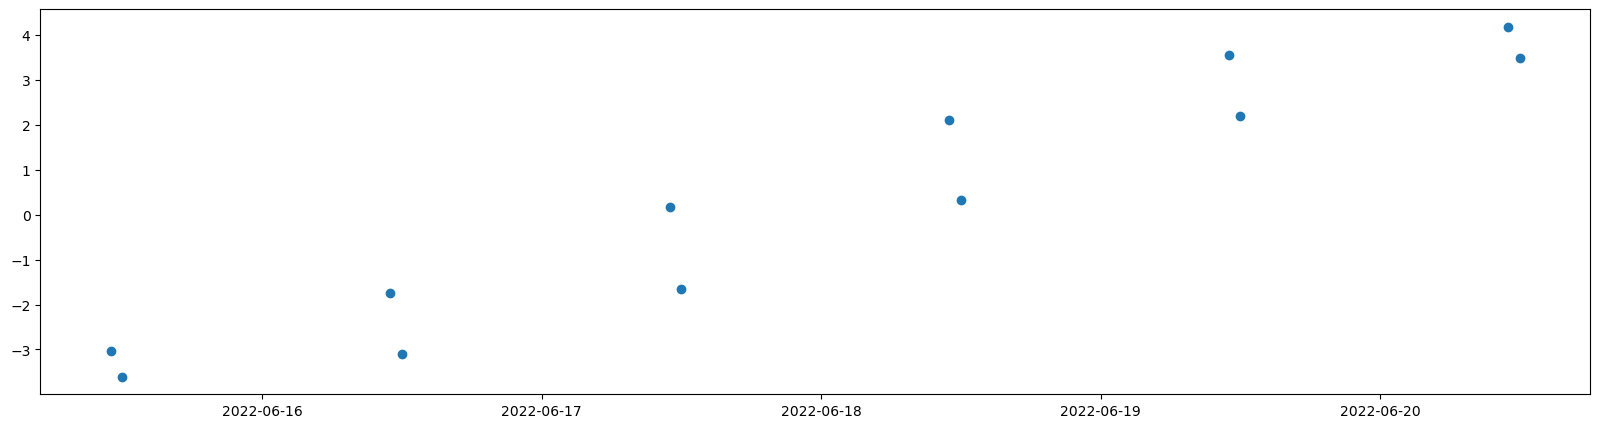

In [23]:
plt.figure(figsize=(20,5))
plt.scatter(tide_2022_midday.loc['2022-06-15':'2022-06-20'].index, tide_2022_midday.loc['2022-06-15':'2022-06-20']["Predicted (ft)"])

<Axes: title={'center': 'Midday Exposure\nFriday Harbor\nJune-August 2022'}, xlabel='Tide height quantile', ylabel='Cumulative midday exposure hours'>

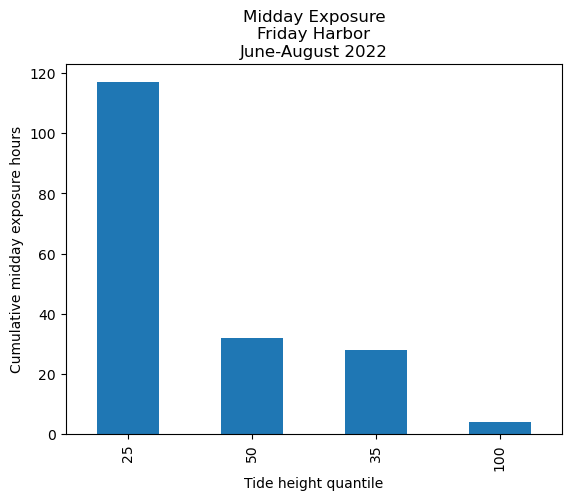

In [56]:
# Plot the distribution of the three tide height categories of midday summer 2022
tide_2022_midday['Height_category'].value_counts().plot(kind='bar', title='Midday Exposure\nFriday Harbor\nJune-August 2022', xlabel = 'Tide height quantile', ylabel='Cumulative midday exposure hours')


In [19]:
tide_2022_midday['Height_category'].value_counts()

Height_category
25     117
50      32
35      28
100      4
Name: count, dtype: int64

It means that in May-September 2022, from 11am to 1pm everyday, there were 263 hours when the tide was in the lowest 25% of the tidal range, 72 hours when the tide was between 25%-35% tidal range, 84 hours between 35%-50%, and 39 hours when the tide was in the higher 50% of the tidal range.

/tmp/ipykernel_17952/2696571884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tide_2022['Scaled Predicted'] = tide_2022['Predicted (ft)']/tidal_range


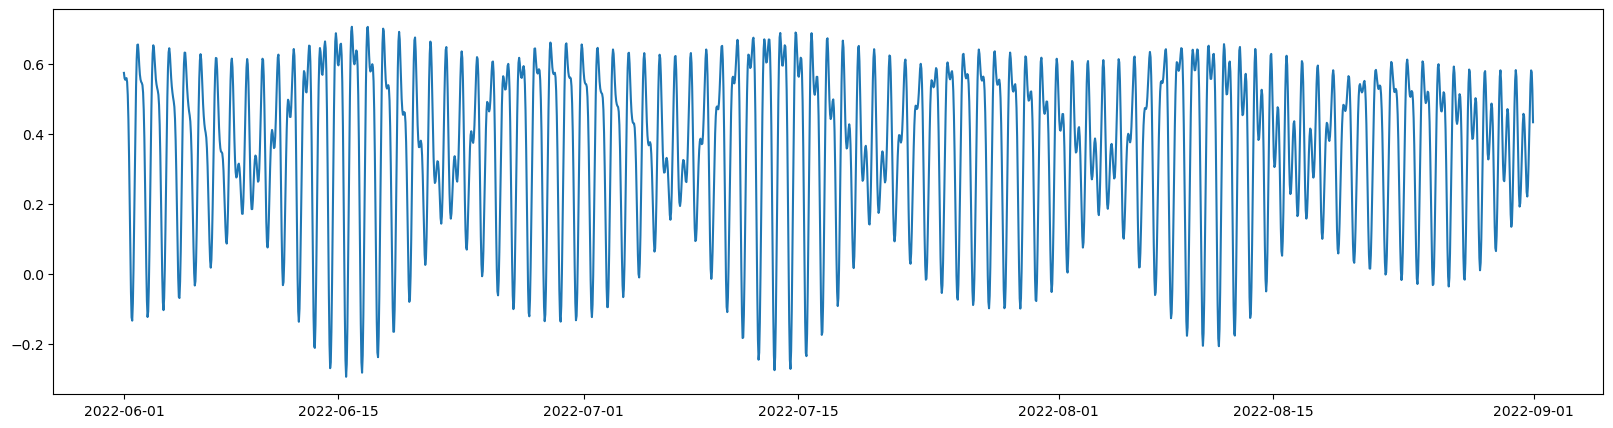

In [46]:
tide_2022['Scaled Predicted'] = tide_2022['Predicted (ft)']/tidal_range

plt.figure(figsize=(20,5))
plt.plot(tide_2022.index, tide_2022['Scaled Predicted'])